In [31]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox

In [32]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import colors
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
df = pd.read_csv("D:/Kaggle/TIme series beer PROD/monthly-beer-production-in-austr.csv")
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [34]:
df.shape

(476, 2)

In [35]:
df.Month = pd.to_datetime(df.Month)

In [36]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<AxesSubplot:xlabel='Month'>

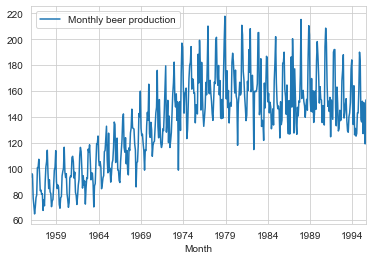

In [37]:
df.plot()

TypeError: 'str' object is not callable

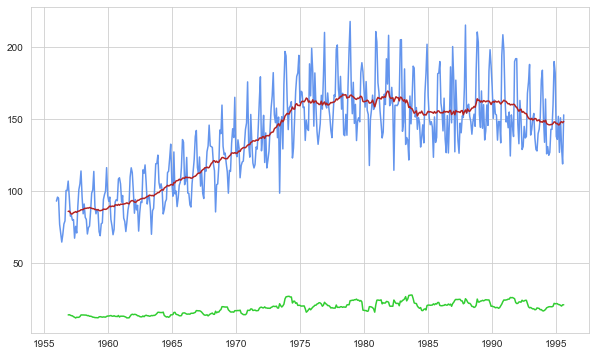

In [41]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()
plt.figure(figsize = (10,6))
plt.plot(df, color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(rolling_std, color='limegreen', label='Rolling Std')
plt.xlabel('Date', size = 12)
plt.ylabel('Monthly Beer Production', size  = 12)
plt.legend(loc = 'upper left')
plt.title('Rolling Statistics', size = 14)
plt.show()

### Checking Stationary

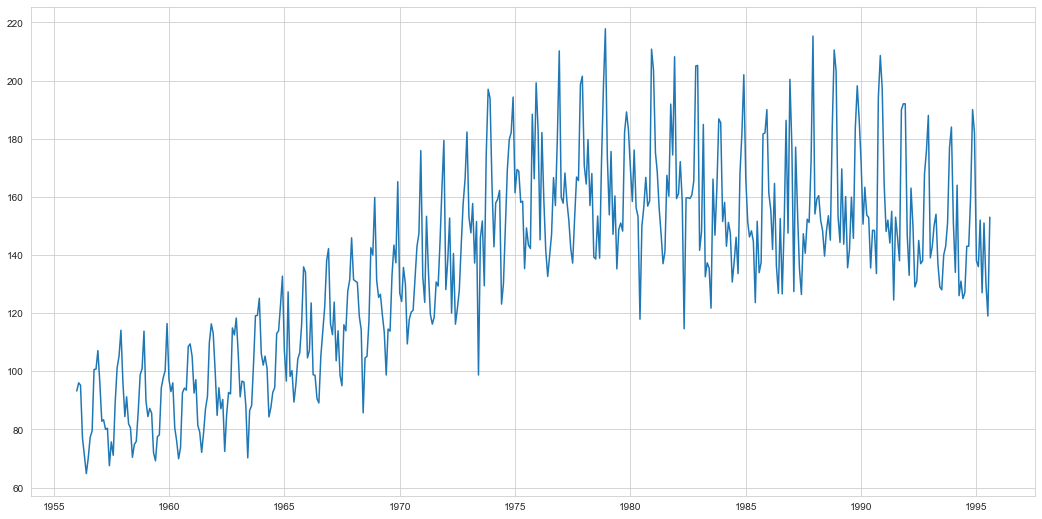

In [42]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

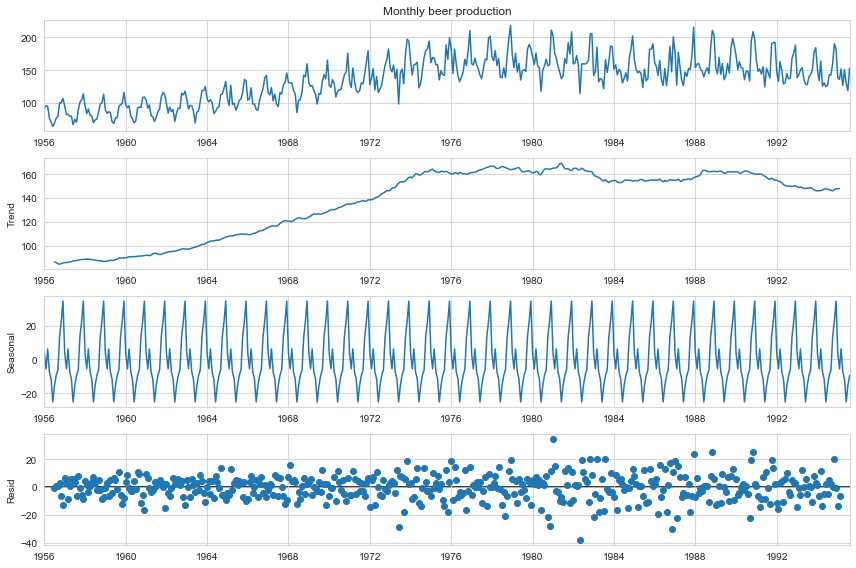

In [44]:
rcParams['figure.figsize']=12,8
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

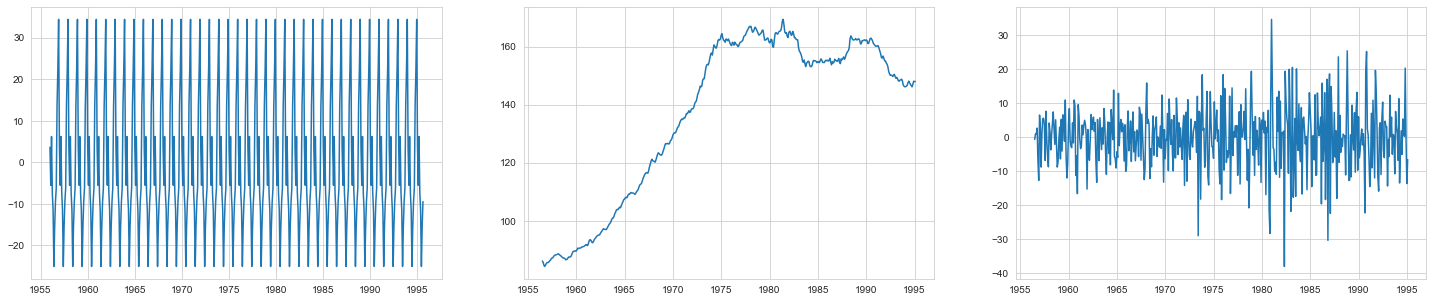

In [45]:
plt.figure(figsize = (25,5))
a = seasonal_decompose(df["Monthly beer production"], model = "add")
plt.subplot(1, 3, 1)
plt.plot(a.seasonal)

plt.subplot(1, 3, 2)
plt.plot(a.trend)

plt.subplot(1, 3, 3)
plt.plot(a.resid)

plt.show()

In [43]:
len(df)

476

In [46]:
from statsmodels.tsa.stattools import adfuller

In [48]:
adftest=adfuller(df)

In [49]:
print('p vale of ad fulller test is',adftest[1])

p vale of ad fulller test is 0.17762099829132416


In [50]:
import statsmodels.api as sm

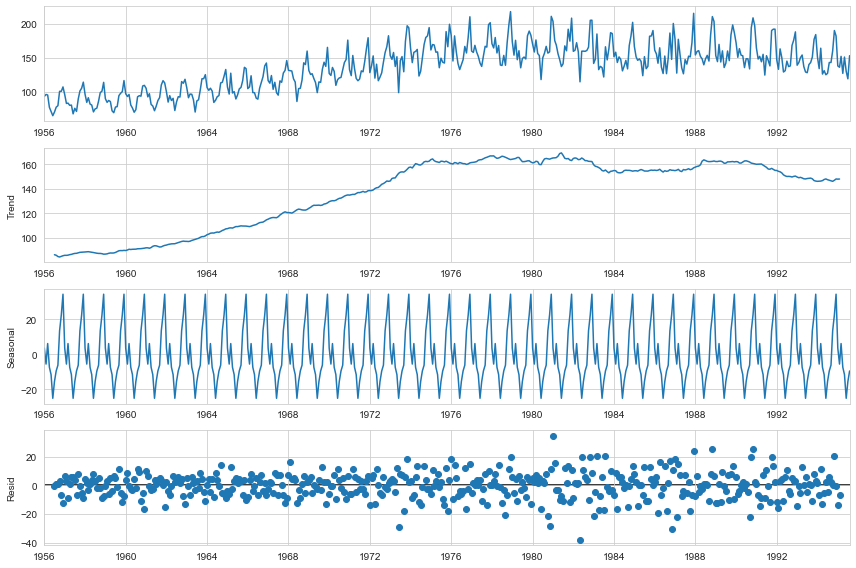

In [51]:
decomposition=sm.tsa.seasonal_decompose(df,model='additive')
fig=decomposition.plot()
plt.show()

### Forecasting Models

In [ ]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Define ARIMA MODEL

In [ ]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

### Predictions

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

In [ ]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(test_data, label = "true values", color = "blue")
plt.plot(arima_pred,label = "forecasts", color='orange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
test_data['ARIMA_Predictions'] = arima_pred

In [ ]:
test_data